# Classification - Example
In this script we demonstrate how a Machine Learning workflow can look like when you use a train, validation and test set. 

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.datasets import load_iris

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Loading Data

In [154]:
# This code is merely executed to see the description and target names in a smooth way
iris = load_iris(as_frame=True)

In [155]:
print(iris.DESCR) # type: ignore (Stänger av den störiga röda linjen under DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Läsa in datan igen

Vi delar upp datan i `X`- och `y`-variabler för att kunna träna på dem.

In [156]:
X, y = load_iris(return_X_y=True, as_frame=True)

# Avkommentera raden nedan om du bara vill använda en typ av blad (sepal). Annars använder vi båda bladen (sepal och petal) för träning.
# X = X[['sepal length (cm)', 'sepal width (cm)']]

## Träning-, validering-, och test-set

Ibland ser man att datan delas upp i tre delar: träning, test, och validering.

I de fallen använder vi träningsdatan till att träna modellen och valideringsdatan för att utvärdera den under arbetets gång. Valideringsdatan kan också användas för att jämföra olika modeller.

Det här sättet var vanligt förr när datorer inte var fullt så kraftfulla som idag.

In [157]:
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
# X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=36)

Nuförtiden är det generellt bättre att använda *cross validation* (CV). Vi måste fortfarande lägga undan ett test-set! Däremot kan vi använda *cross validation* för att både träna och validera modellen. Det är inte minst bra om vi inte har så mycket data.

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# EDA

In [159]:
classes = ['setosa', 'versicolor', 'virginica']

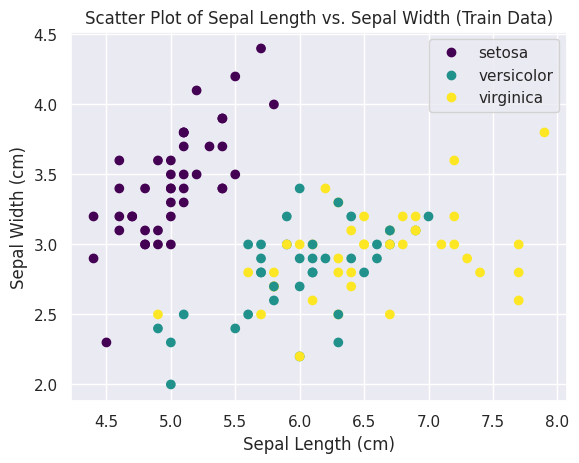

In [160]:
# Om vi bara använder sepal-datan

scatter = plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train, cmap=plt.get_cmap("viridis"))

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width (Train Data)')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

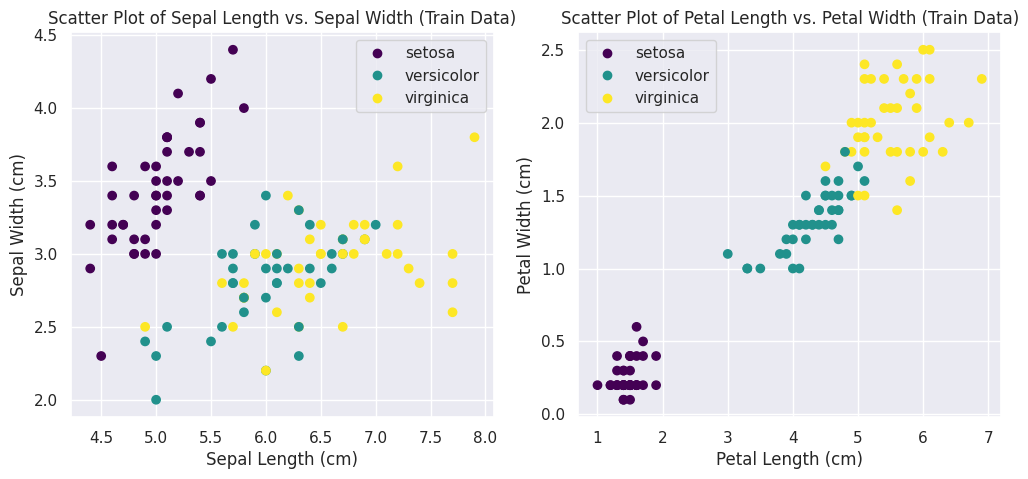

In [161]:
# Om vi använder alla fyra kolumnerna i datasetet

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for ax, l in zip(axs, ["Sepal", "Petal"]):
    ax.scatter(X_train[f'{l.lower()} length (cm)'], X_train[f'{l.lower()} width (cm)'], c=y_train, cmap=plt.get_cmap("viridis"))

    ax.set(xlabel=f'{l} Length (cm)', ylabel=f'{l} Width (cm)', title=f'Scatter Plot of {l} Length vs. {l} Width (Train Data)')
    ax.legend(handles=scatter.legend_elements()[0], labels=classes)

In [162]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2


In [163]:
y_train.head()

62    1
23    0
26    0
48    0
2     0
Name: target, dtype: int64

In [164]:
# 0 = 'setosa', 1 = 'versicolor', 2 = 'virginica'
y_train.value_counts()

target
0    42
2    40
1    38
Name: count, dtype: int64

## Träna två modeller

Vi kan träna två modeller, en `LogisticRegression` och en `DecisionTreeClassifier`. Antingen använder vi validerings-setet för att skapa prediktioner, eller så använder vi *cross validation*, vilket är att rekommendera.

In [165]:
log_reg = LogisticRegression()

# Om vi använder validerings-set
# log_reg.fit(X_train, y_train)
# log_reg_pred = log_reg.predict(X_val)

# Om vi använder cross validation
log_reg_pred = cross_val_predict(log_reg, X_train, y_train)

In [166]:
# Finding the best hyperparameter through GridSearch.
hyper_params = {'max_depth': (None, 1, 2, 5, 10)}

tree_clf = GridSearchCV(DecisionTreeClassifier(), hyper_params)


# Om vi använder validerings-set
# tree_clf.fit(X_train, y_train)
# tree_clf_pred = tree_clf.predict(X_val)

# Om vi använder cross validation
tree_clf_pred = cross_val_predict(tree_clf, X_train, y_train)

## Välja den bästa modellen

Vi kan skapa *confusion matrices* genom funktionen `confusion_matrix` och visualisera dem. Det ger oss en bild av hur modellerna har presterat.

[None, None]

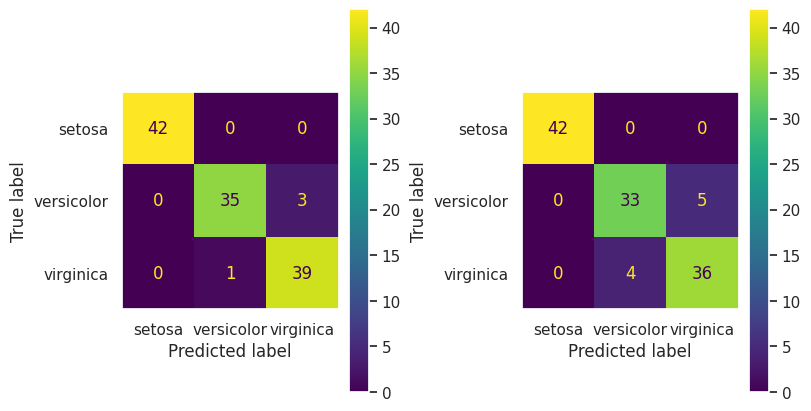

In [167]:
# Om vi använder validerings-set
# cm1 = confusion_matrix(y_val, log_reg_pred)
# cm2 = confusion_matrix(y_val, tree_clf_pred)

cm1 = confusion_matrix(y_train, log_reg_pred)
cm2 = confusion_matrix(y_train, tree_clf_pred)

fig, axs = plt.subplots(1, 2, figsize = (8, 4), layout='constrained')
ConfusionMatrixDisplay(cm1, display_labels = classes).plot(ax=axs[0])
ConfusionMatrixDisplay(cm2, display_labels = classes).plot(ax=axs[1])
[ax.grid(False) for ax in axs]

Vi kan också få en sammanfattning av hur modellen presterat genom funktionen `classification_report`.

In [168]:
# Om vi använder validerings-set
# print(classification_report(y_val, log_reg_pred, target_names=classes))

print(classification_report(y_train, log_reg_pred, target_names=classes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        42
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.97      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [169]:
# Om vi använder validerings-set
# print(classification_report(y_val, tree_clf_pred, target_names=classes))

print(classification_report(y_train, tree_clf_pred, target_names=classes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        42
  versicolor       0.89      0.87      0.88        38
   virginica       0.88      0.90      0.89        40

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.92       120



# Utvärdera modellen på test-setet

`LogisticRegression`-modellen var bäst så den får utvärderas på test-datan.

In [170]:
# Now we retrain our model on the train + validation data. 
log_reg_final = LogisticRegression().fit(X_train, y_train)

pred_test = log_reg_final.predict(X_test)

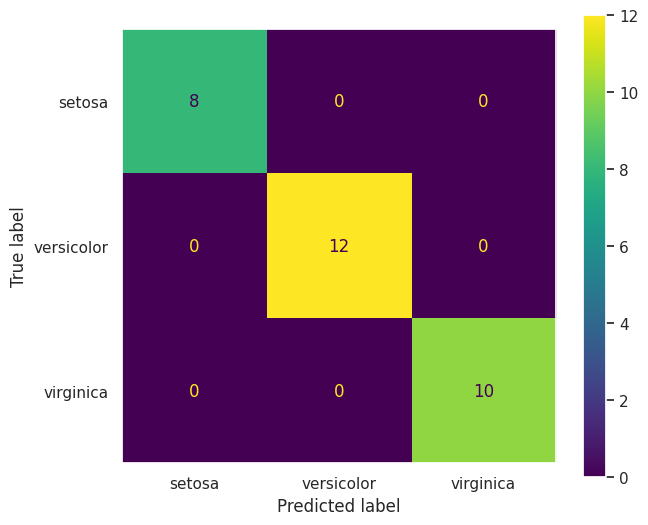

In [171]:
fig, ax = plt.subplots(figsize=(7, 6))
cm_test = confusion_matrix(y_test, pred_test)
ConfusionMatrixDisplay(cm_test, display_labels=classes).plot(ax=ax)
ax.grid(False)

In [172]:
print(classification_report(y_test, pred_test, target_names=classes))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

